In [1]:
import sys
sys.path.append('../')
from cardiac_evalfunctions import *
import active_dynamicmemory.runutils as rutils

In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/m

In [9]:
round(4298/20), round(4298/10), round(4298/8), round(4298/5)  

(215, 430, 537, 860)

To see the dynamics during training validation curves can be plotted by calling `plot_validation_curves(<path_to_config_files>, [optional <list of method names>], [optional <list of random seeds>])`.
Note: Plotting those curves is only useful for methods trained on a continuous datastream

['Siemens', 'GE', 'Philips', 'Canon']


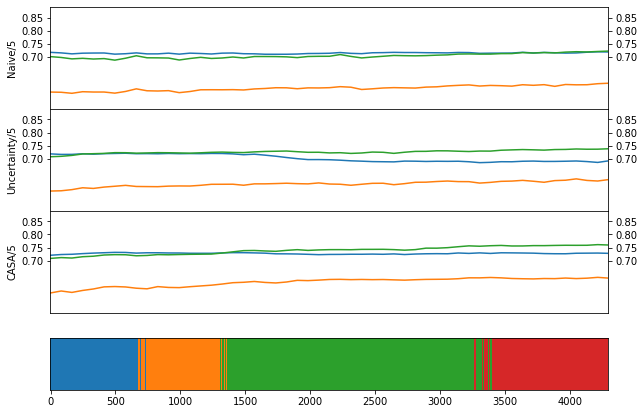

In [7]:
plot_validation_curves(['../training_configs/cardiac_naive_5.yml',
                                '../training_configs/cardiac_uncertainty_5.yml',
                                '../training_configs/cardiac_casa_5.yml'], 
                               names=['Naive/5','Uncertainty/5', 'CASA/5'], seeds=[1, 2, 3, 4, 5])

To evaluate a specific config call `eval_config(<path_to_config_file>)`.

Results are cached to avoid recalculation.

In [4]:
eval_config('../training_configs/cardiac_base.yml')

,scanner,dice_lv,dice_myo,dice_rv,dice_mean
0,Canon,0.398034,0.361050,0.161379,0.302008
1,GE,0.772942,0.665817,0.735189,0.701991
2,Philips,0.819396,0.745160,0.786602,0.774186
3,Siemens,0.854722,0.773785,0.802222,0.799329


In [11]:
df = eval_config('../training_configs/cardiac_joint.yml', seeds=[1, 2, 3, 4, 5])
df.groupby('scanner').agg({'dice_lv': ['mean', 'std'], 'dice_myo': ['mean', 'std'], 'dice_rv': ['mean', 'std'], 'dice_mean': ['mean', 'std']})

dice_lv            dice_myo             dice_rv           dice_mean  \
             mean       std      mean       std      mean       std      mean   
scanner                                                                         
Canon    0.903992  0.012363  0.807224  0.017030  0.806337  0.020631  0.824549   
GE       0.815816  0.012184  0.735946  0.022814  0.796823  0.041845  0.757633   
Philips  0.868793  0.012049  0.793853  0.025845  0.850726  0.017319  0.817905   
Siemens  0.909274  0.005174  0.794061  0.006512  0.797823  0.033638  0.827749   

                   
              std  
scanner            
Canon    0.016153  
GE       0.020276  
Philips  0.022613  
Siemens  0.009223

In [38]:
eval_config('../training_configs/cardiac_naive_5.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.004847,0.003016,0.004740,NaN,0.004201,3
Canon,0.739659,0.643677,0.561608,0.637496,0.645610,3
FWT,0.102412,0.089595,0.092670,NaN,0.094892,3
GE,0.758320,0.655258,0.753680,0.694495,0.715438,3
Philips,0.824466,0.727272,0.806327,0.756009,0.778518,3
Siemens,0.888171,0.792459,0.799212,0.815509,0.823838,3


In [39]:
eval_config('../training_configs/cardiac_naive_8.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.004890,0.000861,0.000183,NaN,0.001978,3
Canon,0.747996,0.638267,0.505964,0.624578,0.629201,3
FWT,0.102820,0.089011,0.081220,NaN,0.091017,3
GE,0.754320,0.650379,0.738511,0.686953,0.707541,3
Philips,0.820293,0.719740,0.804950,0.751547,0.774133,3
Siemens,0.882590,0.788893,0.797726,0.811088,0.820074,3


In [42]:
eval_config('../training_configs/cardiac_naive_20.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.001407,-0.001335,0.000336,NaN,-0.000802,3
Canon,0.701574,0.617681,0.542512,0.610517,0.618071,3
FWT,0.085030,0.076260,0.087272,NaN,0.082854,3
GE,0.747850,0.646706,0.742037,0.684842,0.705359,3
Philips,0.789870,0.696412,0.797321,0.725982,0.752396,3
Siemens,0.882542,0.789185,0.798130,0.811625,0.820371,3


In [45]:
eval_config('../training_configs/cardiac_naive_10.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.005056,-0.005781,-0.000298,NaN,-0.003712,3
Canon,0.668783,0.579406,0.447344,0.560048,0.563895,3
FWT,0.066410,0.057738,0.057212,NaN,0.060453,3
GE,0.755860,0.648188,0.737679,0.686197,0.706981,3
Philips,0.800991,0.705737,0.803468,0.735647,0.761460,3
Siemens,0.882441,0.788702,0.795331,0.810425,0.819225,3


In [16]:
eval_config('../training_configs/cardiac_casa_20.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.001014,0.000447,-0.000695,NaN,0.000255,3
Canon,0.531969,0.436103,0.178823,0.379373,0.381567,3
FWT,0.012864,0.016270,-0.000872,NaN,0.009421,3
GE,0.815027,0.706859,0.752912,0.744742,0.754885,3
Philips,0.853703,0.780144,0.809343,0.809086,0.813069,3
Siemens,0.873943,0.781052,0.808671,0.812197,0.818966,3


In [17]:
eval_config('../training_configs/cardiac_casa_5.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.002330,0.002523,-0.003413,NaN,0.000480,3
Canon,0.749982,0.646656,0.401195,0.594162,0.597999,3
FWT,0.068815,0.077052,0.057743,NaN,0.067870,3
GE,0.842005,0.750914,0.768206,0.776860,0.784496,3
Philips,0.876633,0.823546,0.823384,0.837049,0.840153,3
Siemens,0.872236,0.774936,0.797334,0.806324,0.812707,3


In [20]:
eval_config('../training_configs/cardiac_casa_10.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.002241,0.001612,-0.006510,NaN,-0.000886,3
Canon,0.666290,0.553078,0.251240,0.489147,0.489939,3
FWT,0.044320,0.046496,0.018883,NaN,0.036566,3
GE,0.834134,0.744173,0.768291,0.770439,0.779259,3
Philips,0.864438,0.805146,0.809043,0.821611,0.825059,3
Siemens,0.867874,0.769368,0.788314,0.799980,0.806384,3


In [21]:
eval_config('../training_configs/cardiac_casa_8.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,0.000803,0.001609,-0.001038,NaN,0.000458,3
Canon,0.654042,0.557196,0.300763,0.498991,0.502748,3
FWT,0.050567,0.061453,0.033897,NaN,0.048639,3
GE,0.830479,0.738412,0.768632,0.767038,0.776140,3
Philips,0.872110,0.813418,0.824340,0.831348,0.835304,3
Siemens,0.871596,0.777746,0.804822,0.808848,0.815753,3


In [59]:
eval_config('../training_configs/cardiac_uncertainty_5.yml', seeds=[1, 2, 3, 4, 5], split=['val']).groupby('scanner').mean()

init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_761b34b666
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_761b34b666.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_761b34b666.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicessplitsingle.csv
cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_52b6a09047
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_52b6a09047.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_2_52b6a09047.pt
True True
init cardiac batch with datasetfile /project/catinous/cardiacslicess

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.013907,-0.030762,-0.016244,NaN,-0.020304,3
Canon,0.894118,0.777164,0.768269,0.792498,0.808012,3
FWT,0.074334,0.085918,0.132447,NaN,0.097566,3
GE,0.813018,0.705136,0.758203,0.740686,0.754261,3
Philips,0.851647,0.769582,0.797247,0.800485,0.804740,3
Siemens,0.823437,0.705242,0.733572,0.746151,0.752101,3


In [3]:
eval_config('../training_configs/cardiac_uncertainty_5.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean()

,dice_lv,dice_myo,dice_rv,dice_mean,mean,seed
scanner,,,,,,
BWT,-0.015172,-0.027463,-0.028702,NaN,-0.023779,3
Canon,0.900750,0.800544,0.773786,0.810757,0.821459,3
FWT,0.086800,0.085334,0.117394,NaN,0.096509,3
GE,0.735677,0.621909,0.706578,0.662647,0.681703,3
Philips,0.823527,0.743243,0.796718,0.765491,0.782245,3
Siemens,0.869828,0.745198,0.726300,0.772288,0.778403,3


To evaluate multiple configs at once and get an overview call `eval_config_list(<path_to_config_files>, <list of method names>, [optional <list of random seeds>])`

In [5]:
df_overview = eval_config_list(['../training_configs/cardiac_naive_5.yml', '../training_configs/cardiac_naive_8.yml', 
                                '../training_configs/cardiac_naive_10.yml', '../training_configs/cardiac_naive_20.yml',
                                '../training_configs/cardiac_uncertainty_5.yml',
                                '../training_configs/cardiac_casa_5.yml',  '../training_configs/cardiac_casa_8.yml',  
                                '../training_configs/cardiac_casa_10.yml',  '../training_configs/cardiac_casa_20.yml'], 
                               ['Naive/5', 'Naive/8', 'Naive/10', 'Naive/20', 'Uncertainty/5', 'CASA/5', 'CASA/8', 'CASA/10', 'CASA/20'], seeds=[1, 2, 3, 4, 5])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
CASA/10,0.822,0.740,0.788,0.502,-0.001,0.030
CASA/20,0.834,0.731,0.773,0.406,0.001,0.005
CASA/5,0.824,0.743,0.802,0.609,-0.001,0.060
CASA/8,0.828,0.746,0.792,0.516,-0.001,0.042
Naive/10,0.819,0.707,0.761,0.564,-0.004,0.060
Naive/20,0.820,0.705,0.752,0.618,-0.001,0.083
Naive/5,0.824,0.715,0.779,0.646,0.004,0.095
Naive/8,0.820,0.708,0.774,0.629,0.002,0.091
Uncertainty/5,0.778,0.682,0.782,0.821,-0.024,0.097


In [ ]:
with open('../training_configs/cardiac_naive_5.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
model, logs, df_memory, exp_name = rutils.trained_model(params['trainparams'], params['settings'], training=False)

cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_b24f9dd859
/project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_b24f9dd859.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_memory_tf08_1_b24f9dd859.pt


In [ ]:
df_memory.groupby('scanner').count()

In [4]:
df_overview = eval_config_list(['../training_configs/cardiac_naive.yml', '../training_configs/cardiac_uncertainty.yml', '../training_configs/cardiac_casa.yml'], 
                               ['Naive', 'Uncertainty', 'DM'])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
DM,0.806,0.791,0.841,0.762,-0.001,0.114
Naive,0.806,0.750,0.801,0.570,0.009,0.082
Uncertainty,0.828,0.706,0.792,0.710,0.005,0.091
